## Linear Regression with Scikit-learn
### Dataset
- Foreign Exchange Historical Dataset
- Columns: TIME	USD	GBP	EUR
    - TIME: 2002/04/01 - 2019/2/22
    - USD: US Dollar exchange rate vs JPY
    - GBP: British Sterling exchange rate vs JPY
    - EUR: EUR exchange rate vs JPY
- Data Amount: 4147

## Import Modules
- LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- cross_val_score: Cross Validation method to calculate the error https://en.wikipedia.org/wiki/Cross-validation_(statistics) and you can check more on https://scikit-learn.org/stable/modules/model_evaluation.html
- IPython: you can beautifully show the content of DataFrame  https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Investigate your data
- first tip for making a machine learning model is deeply understand the data you have. in the end, what you will do is finding patterns in your data using machine learning algorithms. how you can spot the pattern without knowing its content! lol
- So using default functions of pandas, e.g., `head()`, `tail()`, you can easily check the content of DataFrame. Also make sure that the data size of X and y are aligned!!

In [2]:
data = pd.read_csv('quote.csv')
display(data.head())
display(data.tail())
display(data.describe())

# X = data.drop(['TIME','USD'],axis=1)
X = data.drop(['USD'],axis=1)
y = data.USD
print(X.shape, y.shape)

,TIME,USD,GBP,EUR
0,2002/4/1,133.15,189.79,116.12
1,2002/4/2,133.20,191.78,117.18
2,2002/4/3,133.20,191.26,116.96
3,2002/4/4,133.10,191.13,117.15
4,2002/4/5,132.30,189.74,116.32


,TIME,USD,GBP,EUR
4142,2019/2/18,110.54,142.64,124.93
4143,2019/2/19,110.58,142.71,124.98
4144,2019/2/20,110.76,144.67,125.71
4145,2019/2/21,110.70,144.34,125.52
4146,2019/2/22,110.78,144.46,125.57


,USD,GBP,EUR
count,4147.000000,4147.000000,4147.000000
mean,105.214538,170.540646,130.897323
std,13.440970,32.847350,15.439406
min,75.760000,117.540000,94.230000
25%,97.085000,142.245000,121.310000
50%,108.690000,170.630000,131.430000
75%,116.035000,196.550000,138.090000
max,133.200000,250.570000,169.620000


(4147, 3) (4147,)


## Create a model with linear regression algorithm

In [3]:
test_index = int(len(X)*0.3)

X_train,X_test,y_train,y_test = X.loc[:test_index, :], X.loc[test_index:, :], y[:test_index+1], y[test_index:]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

clf = LinearRegression()
cv_mse = sum(cross_val_score(clf, X_train.iloc[:, 1:], y_train, scoring='neg_mean_squared_error', cv=5)) / 5
print("Score: %.3f" % cv_mse)

clf.fit(X_train.iloc[:, 1:],y_train)
Y_test_pred = clf.predict(X_test.iloc[:, 1:])

(1245, 3) (2903, 3) (1245,) (2903,)
Score: -109.672


## check how well did it learn!!

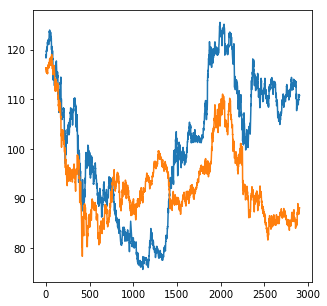

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(5,5))
plt.plot(range(len(y_test)), y_test, label = "Original")
plt.plot(range(len(y_test)), Y_test_pred, label = "Original")